# SOLO PARA LAS SUBTASKS DEL TIPO B

In [1]:
import os
import glob
import json

# Para ver las métricas, basta cambiar la task realizada (task1 o task2) y el nombre del clasificador utilizado en la celda de abajo, luego correr todo el notebook

In [2]:
## Basta con cambiar los valores de esta celda y correr todo
TASK = "task2"
clf_name="MNB"

In [3]:
SUBTASK = f"{TASK}b"
PREDICTION_FILE = f"predictions_{TASK}.json"

In [4]:
data_path = os.path.join("data",TASK,"trial",)
user_files = glob.glob(os.path.join(data_path, "*.txt"))

In [5]:
truth = [file for file in user_files if SUBTASK in file]

In [6]:
gold_truth_dict = {}
with open(truth[0], "r",) as f:
    for line in f.readlines()[1:]:
        subject = line.strip().split(",")[0]
        label = line.strip().split(",")[1]
        gold_truth_dict[subject] = float(label)

In [7]:
gold_truth_list = sorted([[key, value] for key, value in gold_truth_dict.items()])
gold_truth_list
gold_truth = [elem[1] for elem in gold_truth_list]

In [8]:
with open(PREDICTION_FILE, "r",) as f:
    prediction_data = json.load(f)[SUBTASK]

In [9]:
from sklearn.metrics import r2_score, mean_squared_error

rounds = prediction_data.keys()
metrics = []

print("Procesando las rondas...")
for round_number in rounds:
    run0_data = prediction_data[round_number]["0"][0]
    predictions_dict = run0_data["predictions"]
    emissions_dict = run0_data["emissions"]
    predictions_list = sorted([[key, value] for key, value in predictions_dict.items()])
    ypred = [elem[1] for elem in predictions_list]
    print(ypred)
    r2 = r2_score(gold_truth, ypred)
    mse = mean_squared_error(gold_truth, ypred)
    metrics.append([r2, mse])
print("Listo")

Procesando las rondas...
[0.9761111511714994, 0.7390846440896626, 0.5672709894160546, 0.9157853509015291, 0.5577447659113436, 0.27174353642669535, 0.7844724116240777, 0.7720290743244661, 0.17599235184143175, 0.39875972320032804]
[0.9123005101003178, 0.8530134459976638, 0.6629728811112672, 0.998406714347659, 0.6461205698078674, 0.21461103894009964, 0.9142574650546642, 0.7629734391983145, 0.10913674406826021, 0.6490460881141067]
[0.938339170080596, 0.8958660682813656, 0.5155915045478618, 0.9937963668623786, 0.7373251035120624, 0.2313878935095831, 0.8679689328714687, 0.32344045854274833, 0.2211820707800638, 0.6292644593870064]
[0.9381854131800783, 0.8774399474927159, 0.615255077457218, 0.9911467451426519, 0.704799664050198, 0.33835974224603393, 0.851227003696437, 0.31891331571100623, 0.2049248912483692, 0.769623497609737]
[0.9327536959296195, 0.8714863068744918, 0.6988511534350565, 0.9822536181452792, 0.8517825423704772, 0.5399473928072727, 0.7314104550040033, 0.4195772829350966, 0.110251

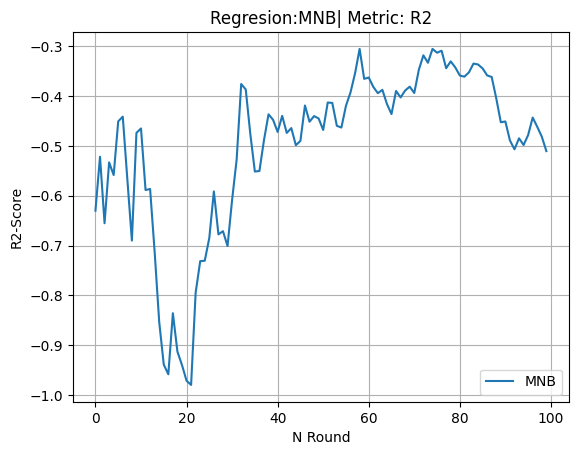

In [10]:
#graficar
import matplotlib.pyplot as plt

r2_list = [elem[0] for elem in metrics]
plt.plot( r2_list , label=clf_name)
plt.title('Regresion:' + clf_name + '| Metric: R2' )
plt.xlabel('N Round')
plt.ylabel("R2-Score")
plt.legend(loc = "lower right")
plt.grid()

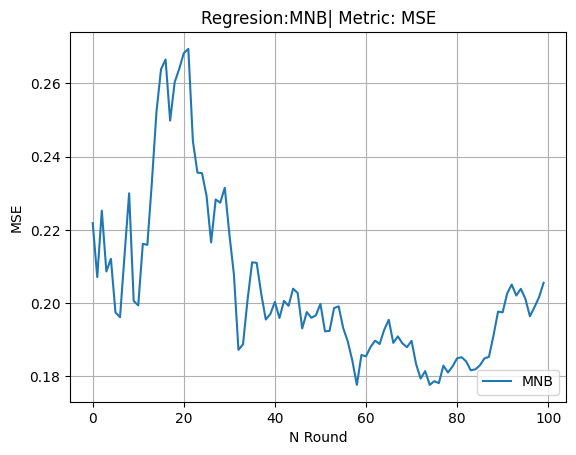

In [11]:
mse_list = [elem[1] for elem in metrics]
plt.plot( mse_list , label=clf_name)
plt.title('Regresion:' + clf_name + '| Metric: MSE' )
plt.xlabel('N Round')
plt.ylabel("MSE")
plt.legend(loc = "lower right")
plt.grid()